 # Time series prediction
 
 Predict kW 48 hours ahead of current time.
 
 In this data reading of meter is bi-hourly. We have to get houly reading in predictions. 
 
 For optimization, our prediction shold not be deviated more than ±5kWh.
 
 ## To Do
 
 1- Sampling (convert bi-hourly data into hourly data)
 
 2- Filling the Data (entering the missing values)
 
 3- Sorting the data timewise (Status: done) ✔️
 
 4- Analysis
 
 How to make Time_stamp indexed? ✔️
 How to fill hourly missing value using pandas?
 
 ### Sub To do
 
 1-Fill hourly missing value.
 
 2-Then mean the

In [26]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
#from plt import rcParams
#rcPramas['figure.figsize'] = 10, 6
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [2]:
dataset = pd.read_csv("3098000032-Mar18-Mar19.csv")

In [3]:
dataset.head(50)

,serial,kWh,kW,kVARh,kVAR,Time_stamp
0,3098000032,10.854,0.000,7.814,0.002,2018-03-01 15:30:00
1,3098000032,10.750,0.000,7.813,0.000,2018-03-01 14:30:00
2,3098000032,12.325,0.086,8.302,0.076,2018-03-05 09:00:00
3,3098000032,12.372,0.094,8.345,0.086,2018-03-05 09:30:00
4,3098000032,12.415,0.086,8.386,0.082,2018-03-05 10:00:00
5,3098000032,12.460,0.090,8.428,0.084,2018-03-05 10:30:00
6,3098000032,12.575,0.230,8.459,0.062,2018-03-05 11:00:00
7,3098000032,12.681,0.212,8.477,0.036,2018-03-05 11:30:00
8,3098000032,12.890,0.418,8.512,0.070,2018-03-05 12:00:00
9,3098000032,13.082,0.384,8.546,0.068,2018-03-05 12:30:00


In [4]:
dataset.describe()

,serial,kWh,kW,kVARh,kVAR
count,1.746200e+04,17462.000000,17462.000000,17462.000000,17462.000000
mean,3.098000e+09,2747.256710,0.750874,1006.527078,0.257706
std,0.000000e+00,1704.039572,1.097139,543.763389,0.247171
min,3.098000e+09,10.750000,0.000000,7.813000,0.000000
25%,3.098000e+09,1358.445000,0.100000,552.427750,0.080000
50%,3.098000e+09,2981.975000,0.212000,1160.990000,0.190000
75%,3.098000e+09,3670.370000,0.834000,1486.230000,0.366000
max,3.098000e+09,6783.840000,6.520000,1721.550000,1.532000


In [5]:
dataset.shape

(17462, 6)

In [6]:
dataset.dtypes

serial          int64
kWh           float64
kW            float64
kVARh         float64
kVAR          float64
Time_stamp     object
dtype: object

In [7]:
#For checking missing values in dataset
dataset.isna().sum()

serial        0
kWh           0
kW            0
kVARh         0
kVAR          0
Time_stamp    0
dtype: int64

dataset.kW.plot()

In [8]:
dataset['Time_stamp'] = pd.to_datetime(dataset['Time_stamp'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Time_stamp'])
df = pd.DataFrame(dataset, columns=['kW', 'Time_stamp'])

In [9]:
#df['Time'] = pd.to_datetime(dataset.Time_stamp)

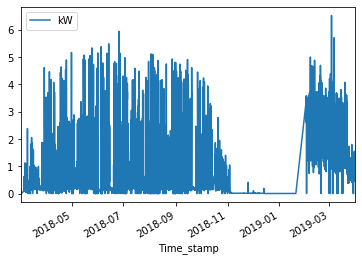

In [10]:
import matplotlib.pyplot as plt
df.plot(x='Time_stamp', y='kW', kind='line') 
plt.show()

In [11]:
#Number of time_stamp per month
df.Time_stamp.dt.month.value_counts()

3     2759
8     1462
5     1452
12    1440
4     1429
9     1427
11    1421
7     1413
10    1257
2     1239
6     1232
1      931
Name: Time_stamp, dtype: int64

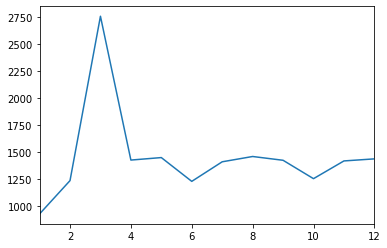

In [12]:
#Line plot of Number of time_stamp per month
df.Time_stamp.dt.month.value_counts().sort_index().plot()

In [13]:
df.Time_stamp.min()

Timestamp('2018-03-01 14:30:00')

In [14]:
df.Time_stamp.max()

Timestamp('2019-04-01 00:00:00')

In [15]:
df.loc[200:250]

,kW,Time_stamp
200,0.060,2018-03-09 10:30:00
201,0.254,2018-03-09 11:00:00
202,0.346,2018-03-09 11:30:00
203,0.344,2018-03-09 12:00:00
204,0.348,2018-03-09 12:30:00
205,0.354,2018-03-09 13:00:00
206,0.556,2018-03-09 13:30:00
207,0.252,2018-03-09 14:00:00
208,0.248,2018-03-09 14:30:00
209,0.278,2018-03-09 15:00:00


## Sorting w.r.t time
Status: Done

In [16]:
df.set_index('Time_stamp', inplace=True)

In [17]:
df.dtypes

kW    float64
dtype: object

In [18]:
#Sorting Time_wise

df = df.sort_values(['Time_stamp'])

In [19]:
df.shape

(17462, 1)

In [34]:
df.head(31)

,kW
Time_stamp,
2018-03-05 09:00:00,0.086
2018-03-05 09:30:00,0.094
2018-03-05 10:00:00,0.086
2018-03-05 10:30:00,0.090
2018-03-05 11:00:00,0.230
2018-03-05 11:30:00,0.212
2018-03-05 12:00:00,0.418
2018-03-05 12:30:00,0.384
2018-03-05 13:00:00,0.384


In [30]:
df.loc['2018-11-12 02:00:00':]

,kW
Time_stamp,


In [22]:
fd = df.loc['2018-11-01 15:30:00':]

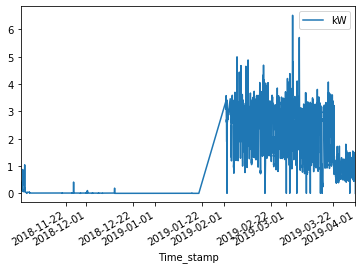

In [23]:
fd.plot()

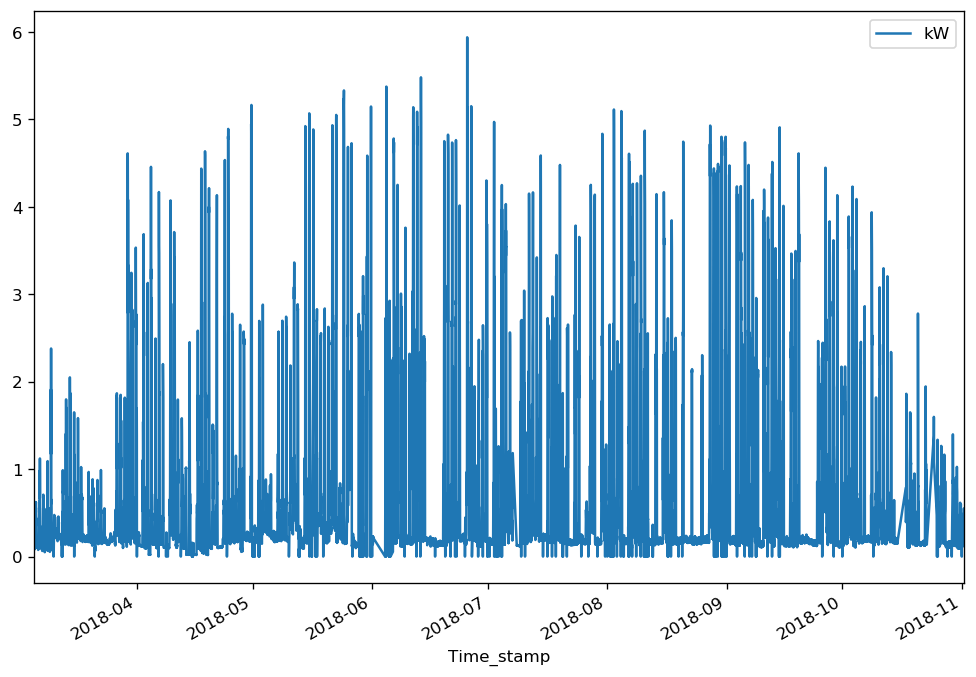

In [27]:
df = df.loc['2018-03-05 09:00:00':'2018-11-01 15:30:00']
df.plot()

### Rolling mean & Rolling statistics

In [35]:
#calculate rolling mean
rollmean = df.rolling(window=30).mean()

#Calculate standard deviation
rollstd = df.rolling(window=30).std()

print(rollmean, rollstd)

                           kW
Time_stamp                   
2018-03-05 09:00:00       NaN
2018-03-05 09:30:00       NaN
2018-03-05 10:00:00       NaN
2018-03-05 10:30:00       NaN
2018-03-05 11:00:00       NaN
...                       ...
2018-11-01 13:30:00  0.224600
2018-11-01 14:00:00  0.232133
2018-11-01 14:30:00  0.237933
2018-11-01 15:00:00  0.251933
2018-11-01 15:30:00  0.256333

[10972 rows x 1 columns]                            kW
Time_stamp                   
2018-03-05 09:00:00       NaN
2018-03-05 09:30:00       NaN
2018-03-05 10:00:00       NaN
2018-03-05 10:30:00       NaN
2018-03-05 11:00:00       NaN
...                       ...
2018-11-01 13:30:00  0.141065
2018-11-01 14:00:00  0.148422
2018-11-01 14:30:00  0.152488
2018-11-01 15:00:00  0.149133
2018-11-01 15:30:00  0.151130

[10972 rows x 1 columns]


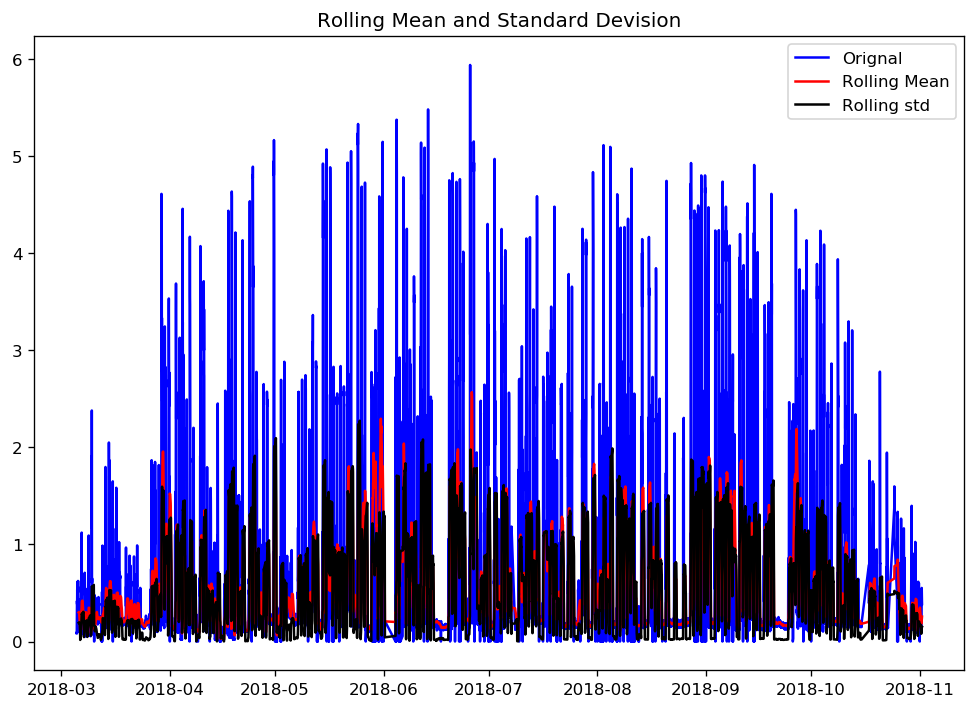

In [40]:
origin = plt.plot(df, color='blue', label="Orignal")
mean = plt.plot(rollmean, color='red', label="Rolling Mean")
std = plt.plot(rollstd, color='black', label="Rolling std")
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Devision')
plt.show(block=False)